## The Date Classification

This is a classification training using a dataset called "Date Fruit Datasets' available on Kaggle: https://www.kaggle.com/datasets/muratkokludataset/date-fruit-datasets/data

Abstract: A great number of fruits are grown around the world, each of which has various types. The factors that determine the type of fruit are the external appearance features such as color, length, diameter, and shape. The external appearance of the fruits is a major determinant of the fruit type. Determining the variety of fruits by looking at their external appearance may necessitate expertise, which is time-consuming and requires great effort. The aim of this study is to classify the types of date fruit, that are, Barhee, Deglet Nour, Sukkary, Rotab Mozafati, Ruthana, Safawi, and Sagai by using three different machine learning methods. In accordance with this purpose, 898 images of seven different date fruit types were obtained via the computer vision system (CVS). Through image processing techniques, a total of 34 features, including morphological features, shape, and color, were extracted from these images. First, models were developed by using the logistic regression (LR) and artificial neural network (ANN) methods, which are among the machine learning methods. Performance results achieved with these methods are 91.0% and 92.2%, respectively. Then, with the stacking model created by combining these models, the performance result was increased to 92.8%. It has been concluded that machine learning methods can be applied successfully for the classification of date fruit types.

In [713]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


In [714]:
df = pd.read_excel('Date_Fruit_Datasets.xlsx')

***
##### First look at the dataset:

In [715]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [716]:
df.shape

(898, 35)

In [717]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [718]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [719]:
df['Class'].loc[155:165]

155    DEGLET
156    DEGLET
157    DEGLET
158    DEGLET
159    DEGLET
160    DEGLET
161    DEGLET
162    DEGLET
163     DOKOL
164     DOKOL
165     DOKOL
Name: Class, dtype: object

***

##### Cleaning the data:

Since each row of the data contains information about one specimen of the date, I will group them by class of the date, so I can see the information about the whole class rather than the individual date. 

In [720]:
df_grouped = df.groupby(by='Class').mean()

In [721]:
df_grouped

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
Class,,,,,,,,,,,,,,,,,,,,,
BERHI,405213.446154,2321.504669,815.370329,634.656000,0.621369,716.904234,0.993957,407666.153846,0.766549,1.288515,...,1.237302,3.805326,5.732585,6.671926,-4.139439e+10,-3.796279e+10,-3.325089e+10,49.352677,48.263368,44.324366
DEGLET,233743.357143,1831.441983,680.222427,440.273151,0.756589,543.476547,0.984319,237428.908163,0.760827,1.550036,...,-0.222301,2.644296,2.642760,2.742700,-3.555533e+10,-3.061273e+10,-2.876142e+10,59.580324,55.605459,54.638908
DOKOL,145147.421569,1436.321190,537.843773,342.949578,0.763276,427.546873,0.987206,147026.990196,0.755143,1.565859,...,-0.142743,3.070927,3.051433,2.751065,-2.370817e+10,-2.213381e+10,-1.897899e+10,61.817167,60.260382,56.393073
IRAQI,433983.583333,2411.046333,836.104518,664.326222,0.595040,742.701772,0.993076,436990.513889,0.763890,1.261814,...,1.072739,5.975487,7.677246,6.215456,-2.909566e+10,-3.064288e+10,-3.057680e+10,40.237440,41.758233,41.056210
ROTANA,387115.867470,2376.310050,832.475543,599.880924,0.686942,701.009730,0.980255,394846.084337,0.736674,1.391999,...,-0.172949,2.763720,2.769380,2.903195,-6.212994e+10,-5.455981e+10,-5.089050e+10,61.717520,58.280622,56.329015
SAFAVI,334367.783920,2329.186030,881.385573,488.488877,0.826394,650.104639,0.973426,343399.924623,0.686883,4.483646,...,0.626492,7.819265,10.384683,4.684819,-9.085305e+09,-1.099945e+10,-1.459300e+10,25.676704,29.007776,33.765713
SOGAY,286872.957447,2051.277354,755.978483,492.676919,0.751864,602.329610,0.971239,295203.734043,0.731430,1.536905,...,0.236660,2.516620,2.728207,2.871002,-3.588859e+10,-2.791138e+10,-2.645158e+10,53.883697,47.810700,47.089709


Checking if there are any missing values:

In [722]:
df.isna().any()

AREA             False
PERIMETER        False
MAJOR_AXIS       False
MINOR_AXIS       False
ECCENTRICITY     False
EQDIASQ          False
SOLIDITY         False
CONVEX_AREA      False
EXTENT           False
ASPECT_RATIO     False
ROUNDNESS        False
COMPACTNESS      False
SHAPEFACTOR_1    False
SHAPEFACTOR_2    False
SHAPEFACTOR_3    False
SHAPEFACTOR_4    False
MeanRR           False
MeanRG           False
MeanRB           False
StdDevRR         False
StdDevRG         False
StdDevRB         False
SkewRR           False
SkewRG           False
SkewRB           False
KurtosisRR       False
KurtosisRG       False
KurtosisRB       False
EntropyRR        False
EntropyRG        False
EntropyRB        False
ALLdaub4RR       False
ALLdaub4RG       False
ALLdaub4RB       False
Class            False
dtype: bool

***

##### Exploring the data:

Looking at the number of dates in each class:

<Axes: xlabel='Class', ylabel='count'>

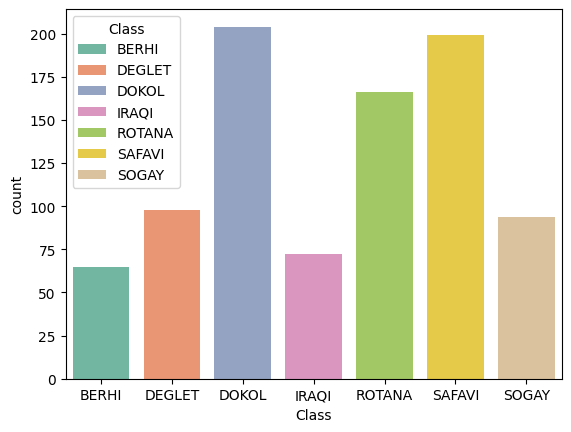

In [723]:
sns.countplot(data=df,x='Class', palette='Set2', hue='Class', legend='full')

Checking the correlation between the features:

<Axes: >

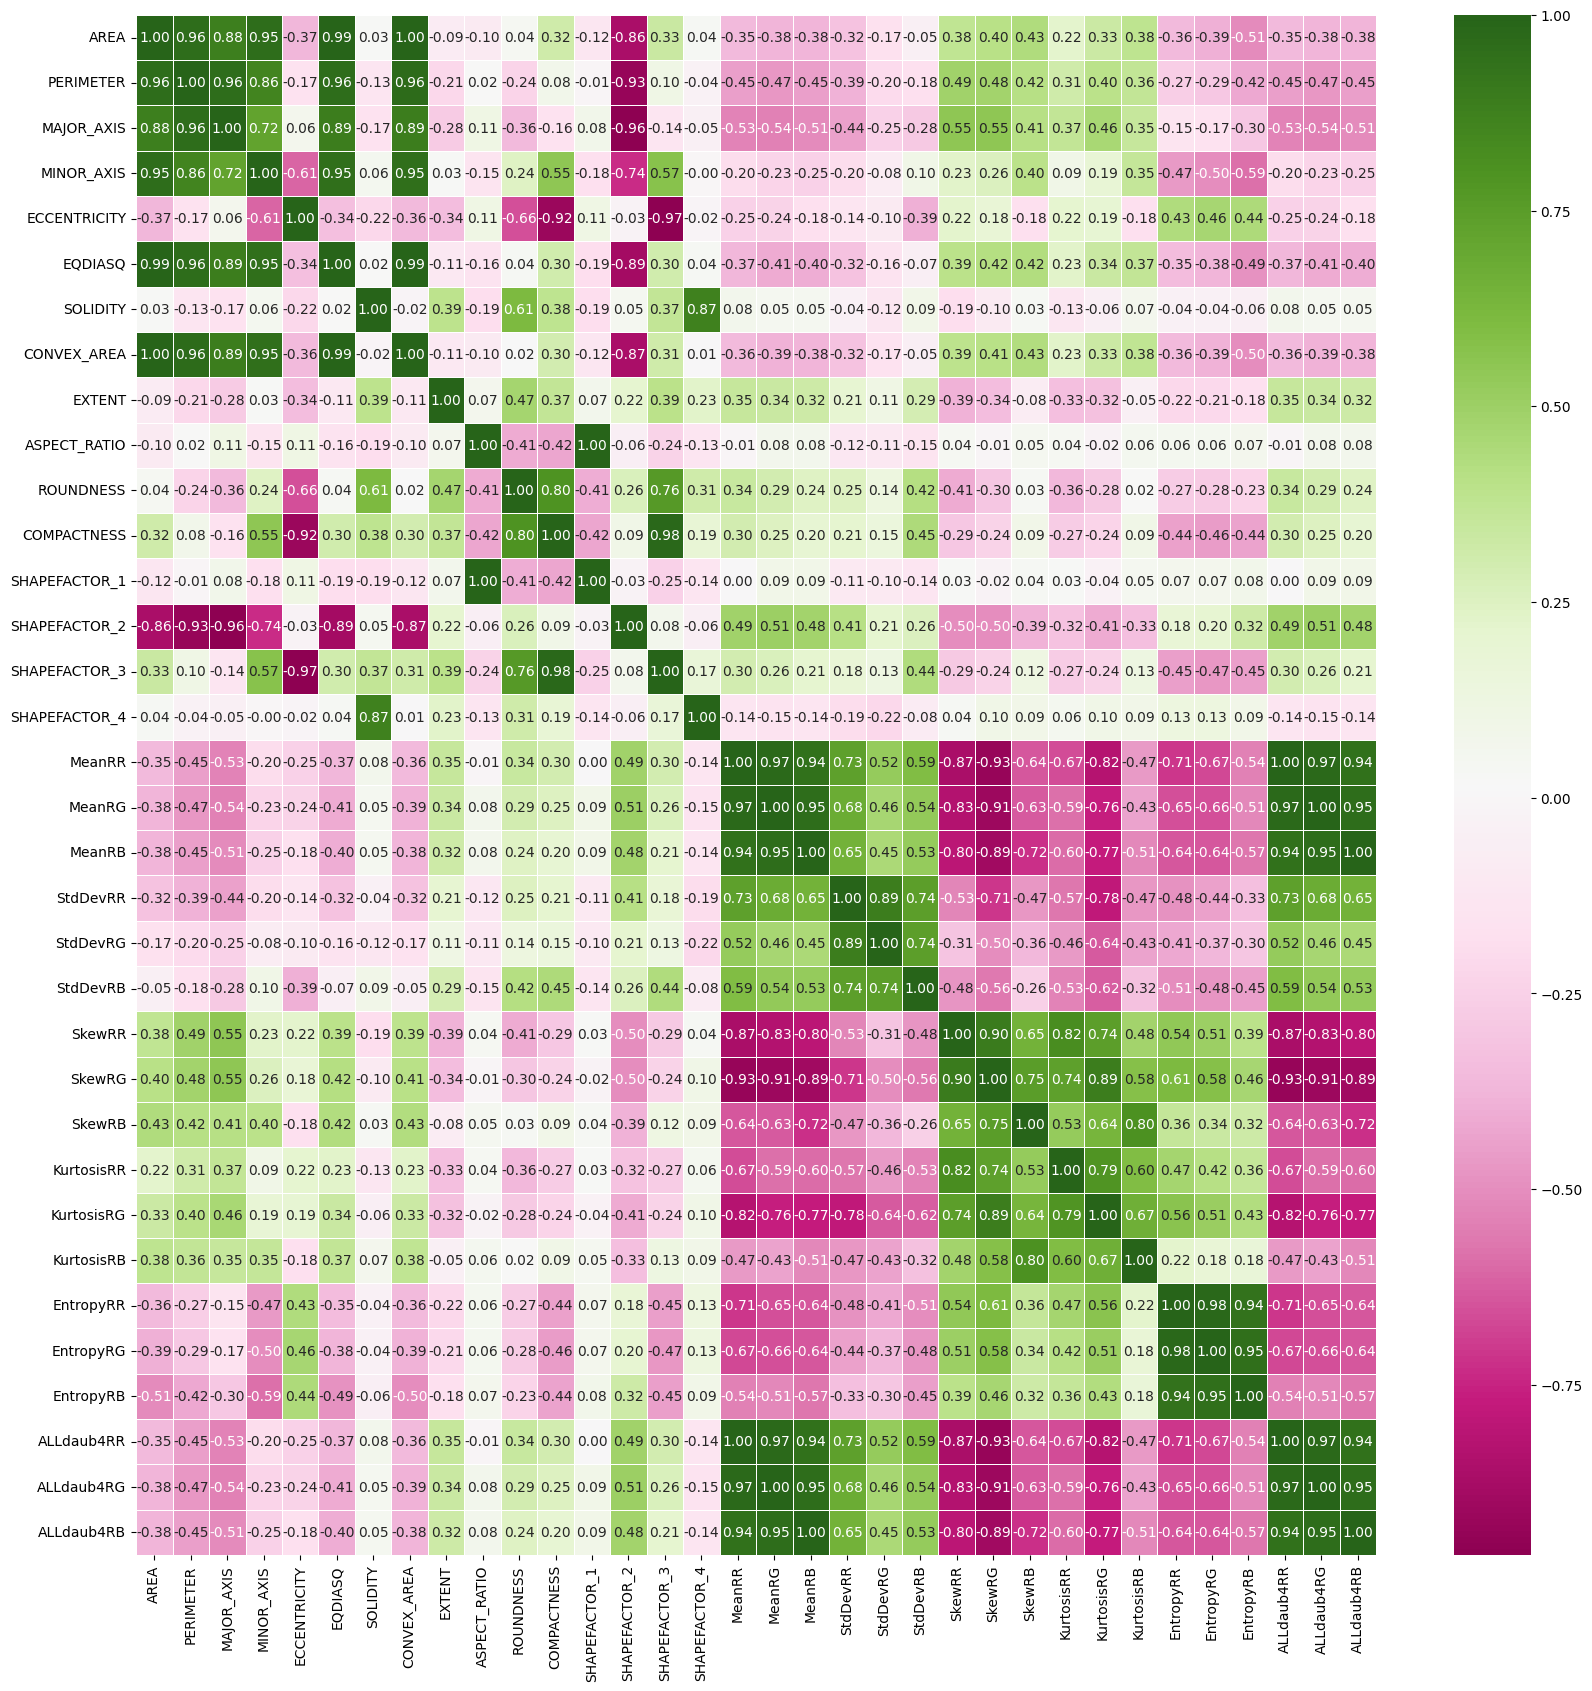

In [724]:
plt.figure(figsize=(20,20))
sns.heatmap(df.loc[:, df.columns != 'Class'].corr(), annot=True, cmap='PiYG', fmt=".2f", linewidths=.5)


There are certain features that have high correlations. For example, area and perimeter are highly positively correlated with 0.96. Although this is to be expected as they convey pretty much the same thing. As the area of the data increases, so does the perimeter. Therefore, I will use only one of these when choosing features for the model.

***

##### Visualizing Outliers:

I am using boxplot to look at the possible outliers.

<function matplotlib.pyplot.show(close=None, block=None)>

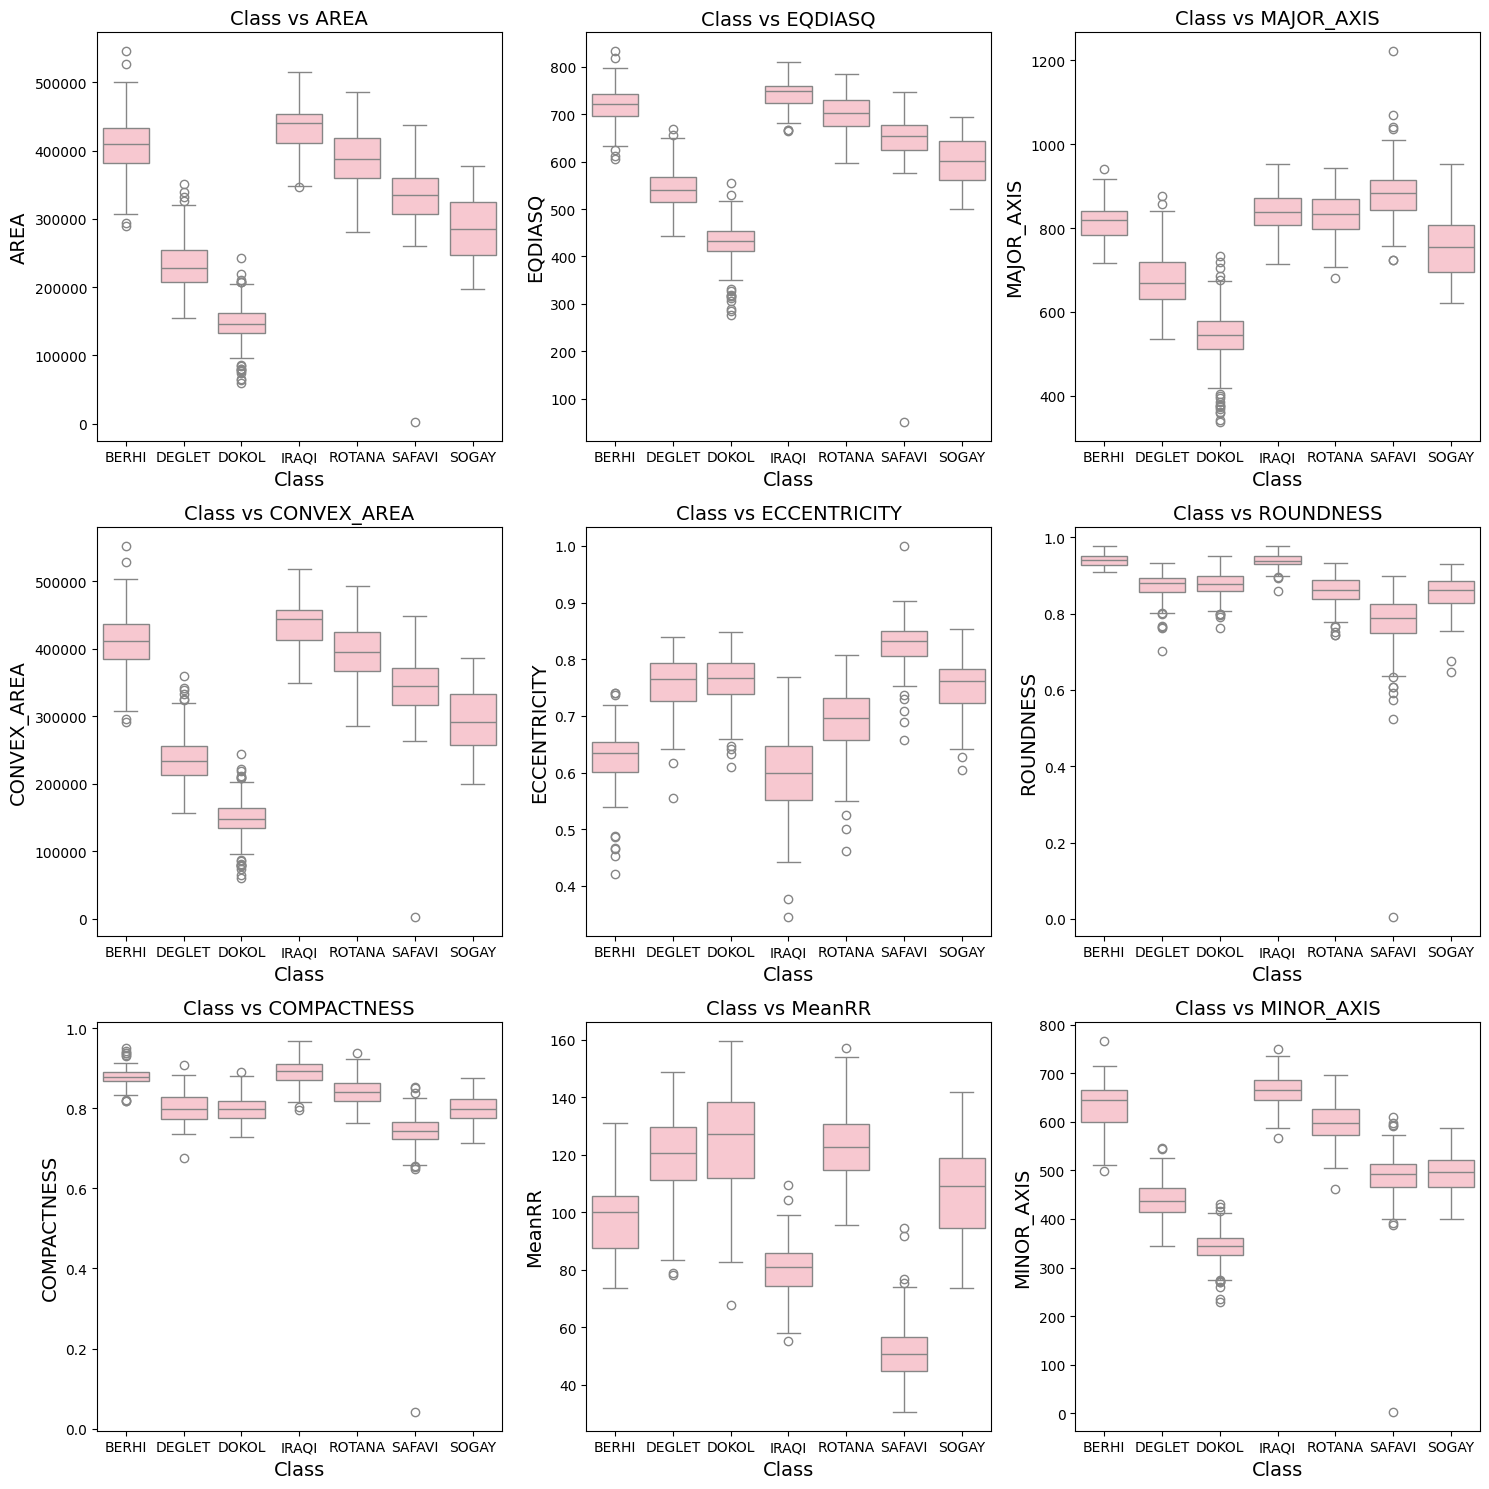

In [725]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()

columns = ['AREA', 'EQDIASQ', 'MAJOR_AXIS', 'CONVEX_AREA', 'ECCENTRICITY', 'ROUNDNESS', 'COMPACTNESS', 'MeanRR', 'MINOR_AXIS']

for i, ax in enumerate(axs):
    sns.boxplot(data=df, x=df["Class"], y=df[columns[i]], hue=None ,color='pink',ax=ax)
    ax.set_title(f'Class vs {columns[i]}', fontsize=14)
    ax.set_xlabel('Class', fontsize=14)
    ax.set_ylabel(columns[i], fontsize=14)


plt.tight_layout()
plt.show

Based on this visualization I can see that there are some outliers that should be removed during the preprocessing. 'Safavi' class seems to have one constant outlier, could be a bad entry.

***

##### Deviding the Data:

As too highly correlated features (especially in this case where they describe the similar thing) can affect the accuracy in regression I will be removing some columns:

In [726]:
df.drop(["PERIMETER","MAJOR_AXIS","MINOR_AXIS","CONVEX_AREA","MeanRR","ALLdaub4RR","EntropyRG"], axis=1, inplace=True)

Deviding the dataset into train and test:

In [727]:
X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [728]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (628, 27)
X_test shape: (270, 27)
y_train shape: (628,)
y_test shape: (270,)


In [729]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   ECCENTRICITY   898 non-null    float64
 2   EQDIASQ        898 non-null    float64
 3   SOLIDITY       898 non-null    float64
 4   EXTENT         898 non-null    float64
 5   ASPECT_RATIO   898 non-null    float64
 6   ROUNDNESS      898 non-null    float64
 7   COMPACTNESS    898 non-null    float64
 8   SHAPEFACTOR_1  898 non-null    float64
 9   SHAPEFACTOR_2  898 non-null    float64
 10  SHAPEFACTOR_3  898 non-null    float64
 11  SHAPEFACTOR_4  898 non-null    float64
 12  MeanRG         898 non-null    float64
 13  MeanRB         898 non-null    float64
 14  StdDevRR       898 non-null    float64
 15  StdDevRG       898 non-null    float64
 16  StdDevRB       898 non-null    float64
 17  SkewRR         898 non-null    float64
 18  SkewRG    

As all columns except for the column 'Class' are numerical, I don't need to split them into numerical and categorical columns. 

***

##### Data preprocessing:

Removing the outliers from the training data:

In [730]:
lower_percentile = 0.1
upper_percentile = 99.4

lower_limit = np.percentile(X_train, lower_percentile, axis=0)
upper_limit = np.percentile(X_train, upper_percentile, axis=0)

X_train = X_train[
    (X_train >= lower_limit) & (X_train <= upper_limit)
].dropna()

y_train = y_train[X_train.index]

In [731]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (566, 27)
X_test shape: (270, 27)
y_train shape: (566,)
y_test shape: (270,)


I will use the standard scaler for all of the features except 'Class', and label encoder for the feature 'Class', as it is categorical:

In [732]:
scaler=StandardScaler()
X_test = scaler.fit_transform(X_test)
X_train = scaler.fit_transform(X_train)

In [733]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

***

##### Testing out models:

In [734]:
def modelling(x_train, x_test, y_train, y_test):
    precision = []
    recall = []
    f1 = []

    models = [
        LogisticRegression(),
        KNeighborsClassifier(n_neighbors=35),
        DecisionTreeClassifier(criterion="gini"),
        RandomForestClassifier(n_estimators=200, criterion="gini")
    ]

    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        precision.append(precision_score(y_test, y_pred, average="micro"))
        recall.append(recall_score(y_test, y_pred, average="micro"))
        f1.append(f1_score(y_test, y_pred, average="micro"))

    model_names = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier',
                   'RandomForestClassifier']
    result_df = pd.DataFrame({'Recall': recall, 'Precision': precision, 'F1_Score': f1}, index=model_names)
    result_df = result_df.sort_values(by="Recall", ascending=False)


    print(classification_report(y_test, y_pred))
    return result_df

In [735]:
result_df= modelling(X_train, X_test, y_train, y_test)
result_df

              precision    recall  f1-score   support

           0       0.86      0.71      0.77        17
           1       0.61      0.71      0.66        28
           2       0.98      0.88      0.93        67
           3       0.79      0.90      0.84        21
           4       1.00      0.93      0.96        55
           5       0.96      1.00      0.98        51
           6       0.74      0.84      0.79        31

    accuracy                           0.88       270
   macro avg       0.85      0.85      0.85       270
weighted avg       0.89      0.88      0.88       270



,Recall,Precision,F1_Score
LogisticRegression,0.929630,0.929630,0.929630
RandomForestClassifier,0.881481,0.881481,0.881481
KNeighborsClassifier,0.862963,0.862963,0.862963
DecisionTreeClassifier,0.833333,0.833333,0.833333
